In [2]:
import pandas as pd
import csv

frame = pd.read_csv("../data/data.csv",index_col=0)


# Excess Readmission Ratio
frame["ERR"]=frame["RPR"]/frame["RER"]

# excessiveness
frame["zero"]=0
frame["sub"]=frame["ERR"]-1
frame["excess"]=frame[["zero","sub"]].max(axis=1)

# penalty
frame["product"]=frame["excess"]*frame["MedicareFr"]
frame["cap"]=0.03
frame["penalty"]=frame[["product","cap"]].min(axis=1)

# payment
frame["payment"]=1-frame["penalty"]

# Revenue at RER
frame["ERevenue"]=1*(1/(1-frame["RER"]/100))

# Revenue at RPR
frame["Revenue"]=frame["payment"]*(1/(1-frame["RPR"]/100))



frame=frame.drop(['zero', 'sub' , 'product' , 'cap'], axis=1)

frame.head(0)

,HospitalID,MedicareFr,RPR,RER,ERR,excess,penalty,payment,ERevenue,Revenue
County,,,,,,,,,,


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

def hospital(n):
    
    y_lower=frame["ERevenue"][n]-0.1
    y_mid=frame["ERevenue"][n]
    y_upper=frame["ERevenue"][n]+0.1
    
    rer=frame["RER"][n]/100
    arr_x1=[rer,rer,rer]
    arr_y1=[y_lower,y_mid,y_upper]
    
    x2=Symbol('x')
    x2=solve((0.97*frame["MedicareFr"][n]+(1-frame["MedicareFr"][n]))*(1/(1-x2))-frame["ERevenue"][n])[0]

    
    arr_x2=[x2,x2,x2]
    arr_y2=[y_lower,y_mid,y_upper]
    
    
    x =np.arange(rer-0.1,x2+0.1,0.001)
    y=[]
    flag=0
    yii=0
    for xi in x:
        if xi<frame["RER"][n]/100:
            yi=1*(1/(1-xi))
        else:
            err=xi/(frame["RER"][n]/100)-1
            penalty=err*frame["MedicareFr"][n]
            if penalty<=0.03*frame["MedicareFr"][n]:
                payment=1-penalty
                yi=payment*(1/(1-xi))
            else:
                penalty=0.03*frame["MedicareFr"][n]
                payment=1-penalty
                yi=payment*(1/(1-xi))
        y.append(yi)

        while yi<yii:
            flag=1
            break
        yii=yi
    
    plt.plot(x,y,color="blue")
    
    plt.plot(arr_x1,arr_y1,color="red")

    print(frame["RPR"][n]/100)
    print([rer,x2])
    

    
    if flag==0:
        print("decision:no")
    else:
        plt.plot(arr_x2,arr_y2,color="green")
        if frame["RPR"][n]/100>=x2:
            print("decision:no")
        elif frame["RPR"][n]/100<=rer:
            print('decision:no')
        else:
            print("decision:yes")
    

    
    plt.show()
    

0.2591125488
[0.2393809509, 0.253097519901891]
decision:no


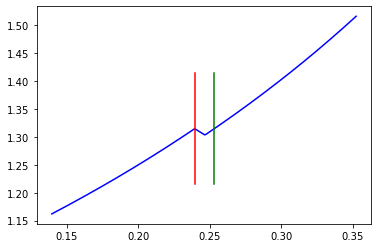

In [5]:
# 50158

hospital(58)

0.2169606209
[0.2101259804, 0.233822200987998]
decision:no


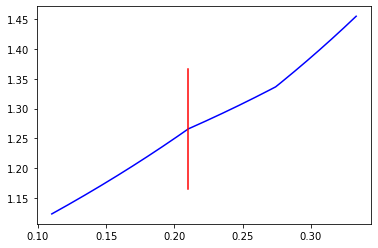

In [34]:
# 50245

hospital(84)

0.2035890198
[0.1988334465, 0.222868443105001]
decision:yes


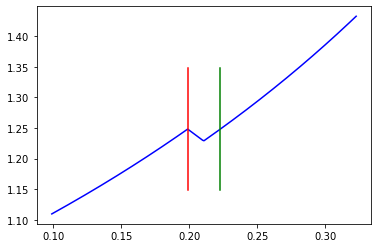

In [4]:
hospital(15)

In [5]:
def hospital1(n):
    
    rer=frame["RER"][n]/100
    
    x2=Symbol('x')
    x2=solve((0.97*frame["MedicareFr"][n]+(1-frame["MedicareFr"][n]))*(1/(1-x2))-frame["ERevenue"][n])[0]
    
    x =np.arange(rer-0.01,x2+0.01,0.0001)
    y=[]
    flag=0
    yii=0
    for xi in x:
        if xi<frame["RER"][n]/100:
            yi=1*(1/(1-xi))
        else:
            err=xi/(frame["RER"][n]/100)-1
            penalty=err*frame["MedicareFr"][n]
            if penalty<=0.03:
                payment=1-penalty
                yi=payment*(1/(1-xi))
            else:
                penalty=0.03
                payment=1-penalty
                yi=payment*(1/(1-xi))
        y.append(yi)

        while yi<yii:
            flag=1
            break
        yii=yi
    
    if flag==0:
        frame1["Decision"][n]="no"
    else:
        if frame["RPR"][n]/100>=x2:
            frame1["Decision"][n]="no"
        elif frame["RPR"][n]/100<=rer:
            frame1["Decision"][n]="no"
        else:
            frame1["Decision"][n]="yes"

In [7]:
frame1=frame.copy()
frame1["Decision"]="nan"

for n in range(len(frame1)):
    hospital1(n)

frame1.to_csv("../data/data_modified.csv")
frame1

<ipython-input-5-5337b9002c49>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1["Decision"][n]="no"
<ipython-input-5-5337b9002c49>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1["Decision"][n]="no"
<ipython-input-5-5337b9002c49>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1["Decision"][n]="yes"
<ipython-input-5-5337b9002c49>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,HospitalID,MedicareFr,RPR,RER,ERR,excess,penalty,payment,ERevenue,Revenue,Decision
County,,,,,,,,,,,
Alameda,50002,0.385420,24.126127,22.505701,1.072001,0.072001,0.027750,0.972250,1.290418,1.281402,no
Humboldt,50006,0.463131,16.193045,19.058270,0.849660,0.000000,0.000000,1.000000,1.235457,1.193218,no
San Mateo,50007,0.302269,20.862410,20.750566,1.005390,0.005390,0.001629,0.998371,1.261839,1.261563,yes
Napa,50009,0.430666,20.507330,22.007002,0.931855,0.000000,0.000000,1.000000,1.282166,1.257978,no
Napa,50013,0.487894,20.139364,21.881418,0.920387,0.000000,0.000000,1.000000,1.280105,1.252181,no
...,...,...,...,...,...,...,...,...,...,...,...
Orange,50746,0.150837,20.370153,21.221683,0.959875,0.000000,0.000000,1.000000,1.269385,1.255811,no
Los Angeles,50752,0.544773,25.725578,24.427887,1.053123,0.053123,0.028940,0.971060,1.323239,1.307395,no
San Diego,50757,0.458330,20.635431,21.956419,0.939836,0.000000,0.000000,1.000000,1.281335,1.260008,no


In [37]:
frame["HospitalID"][101]

50327

0.2289609528
[0.22029066090000002, 0.243681941073000]
decision:no


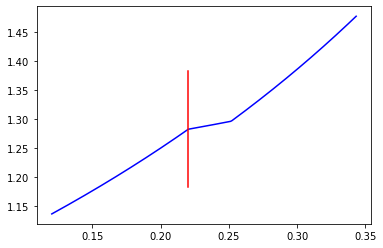

In [38]:
hospital(101)

0.19609874730000001
[0.20366527560000003, 0.227555317332003]
decision:no


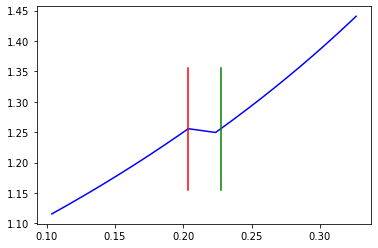

In [39]:
hospital(100)

0.21565698619999998
[0.2104916191, 0.234176870526998]
decision:yes


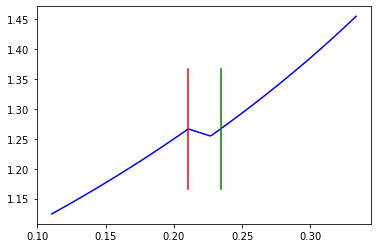

In [41]:
hospital(62)

0.24295127870000002
[0.2280913353, 0.251248595240998]
decision:yes


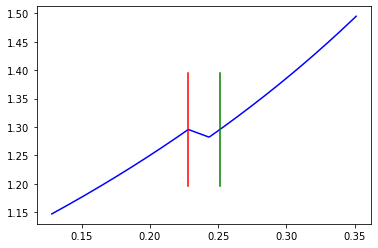

In [4]:
hospital(81)